## D209 - Data Mining I - PA2

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pandas import DataFrame
import sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

### Load Data From medical_clean.csv

In [2]:
# load data file
df = pd.read_csv('medical_clean.csv')
# quick test the data is present and see the shape
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,...,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,...,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,...,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,...,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,...,2113.073274,3716.525786,2,1,3,3,5,3,4,3


---
### Exploratory Data Analysis
---

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

#### Look for Missing Values

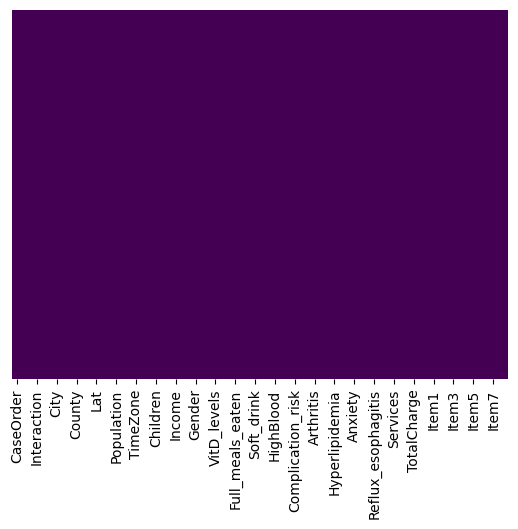

In [4]:
# Mapping to view missing data...none present.
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis');

In [5]:
df.describe()

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,VitD_levels,Doc_visits,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,50159.323900,38.751099,-91.243080,9965.253800,2.097200,53.511700,40490.495160,17.964262,5.012200,...,5312.172769,12934.528587,3.518800,3.506700,3.511100,3.515100,3.496900,3.522500,3.494000,3.509700
std,2886.89568,27469.588208,5.403085,15.205998,14824.758614,2.163659,20.638538,28521.153293,2.017231,1.045734,...,2180.393838,6542.601544,1.031966,1.034825,1.032755,1.036282,1.030192,1.032376,1.021405,1.042312
min,1.00000,610.000000,17.967190,-174.209700,0.000000,0.000000,18.000000,154.080000,9.806483,1.000000,...,1938.312067,3125.703000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,27592.000000,35.255120,-97.352982,694.750000,0.000000,36.000000,19598.775000,16.626439,4.000000,...,3179.374015,7986.487755,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,50207.000000,39.419355,-88.397230,2769.000000,1.000000,53.000000,33768.420000,17.951122,5.000000,...,5213.952000,11573.977735,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,3.000000,3.000000
75%,7500.25000,72411.750000,42.044175,-80.438050,13945.000000,3.000000,71.000000,54296.402500,19.347963,6.000000,...,7459.699750,15626.490000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.00000,99929.000000,70.560990,-65.290170,122814.000000,10.000000,89.000000,207249.100000,26.394449,9.000000,...,9180.728000,30566.070000,8.000000,7.000000,8.000000,7.000000,7.000000,7.000000,7.000000,7.000000


### Describe and Explore Numeric Fields:

In [6]:
df.describe(include = [np.number])

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,VitD_levels,Doc_visits,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,50159.323900,38.751099,-91.243080,9965.253800,2.097200,53.511700,40490.495160,17.964262,5.012200,...,5312.172769,12934.528587,3.518800,3.506700,3.511100,3.515100,3.496900,3.522500,3.494000,3.509700
std,2886.89568,27469.588208,5.403085,15.205998,14824.758614,2.163659,20.638538,28521.153293,2.017231,1.045734,...,2180.393838,6542.601544,1.031966,1.034825,1.032755,1.036282,1.030192,1.032376,1.021405,1.042312
min,1.00000,610.000000,17.967190,-174.209700,0.000000,0.000000,18.000000,154.080000,9.806483,1.000000,...,1938.312067,3125.703000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,27592.000000,35.255120,-97.352982,694.750000,0.000000,36.000000,19598.775000,16.626439,4.000000,...,3179.374015,7986.487755,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,50207.000000,39.419355,-88.397230,2769.000000,1.000000,53.000000,33768.420000,17.951122,5.000000,...,5213.952000,11573.977735,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,3.000000,3.000000
75%,7500.25000,72411.750000,42.044175,-80.438050,13945.000000,3.000000,71.000000,54296.402500,19.347963,6.000000,...,7459.699750,15626.490000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.00000,99929.000000,70.560990,-65.290170,122814.000000,10.000000,89.000000,207249.100000,26.394449,9.000000,...,9180.728000,30566.070000,8.000000,7.000000,8.000000,7.000000,7.000000,7.000000,7.000000,7.000000


In [7]:
df_num = df.select_dtypes(include='number')
df_num.head()

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,VitD_levels,Doc_visits,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,35621,34.34960,-86.72508,2951,1,53,86575.93,19.141466,6,...,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,32446,30.84513,-85.22907,11303,3,51,46805.99,18.940352,4,...,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,57110,43.54321,-96.63772,17125,3,53,14370.14,18.057507,4,...,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,56072,43.89744,-93.51479,2162,0,78,39741.49,16.576858,4,...,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,23181,37.59894,-76.88958,5287,1,22,1209.56,17.439069,5,...,2113.073274,3716.525786,2,1,3,3,5,3,4,3


### Describe and Explore Categorical Fields:

In [8]:
df.describe(exclude = [np.number])

,Customer_id,Interaction,UID,City,State,County,Area,TimeZone,Job,Marital,...,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services
count,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,...,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
unique,10000,10000,10000,6072,52,1607,3,26,639,5,...,2,2,2,2,2,2,2,2,2,4
top,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Houston,TX,Jefferson,Rural,America/New_York,Outdoor activities/education manager,Widowed,...,Yes,No,No,No,No,No,No,No,No,Blood Work
freq,1,1,1,36,553,118,3369,3889,29,2045,...,7094,6426,7262,6628,5886,6785,6059,5865,7107,5265


In [9]:
df_cat = df.select_dtypes(exclude='number')
df_cat.head()

,Customer_id,Interaction,UID,City,State,County,Area,TimeZone,Job,Marital,...,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services
0,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,Suburban,America/Chicago,"Psychologist, sport and exercise",Divorced,...,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Blood Work
1,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,Urban,America/Chicago,Community development worker,Married,...,Yes,No,No,No,No,No,No,Yes,No,Intravenous
2,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,Suburban,America/Chicago,Chief Executive Officer,Widowed,...,Yes,No,Yes,No,No,No,No,No,No,Blood Work
3,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,Suburban,America/Chicago,Early years teacher,Married,...,No,Yes,No,No,No,No,No,Yes,Yes,Blood Work
4,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,Rural,America/New_York,Health promotion specialist,Widowed,...,No,No,No,Yes,No,No,Yes,No,No,CT Scan


In [10]:
df[['ReAdmis']].describe()
df

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,...,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,...,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,...,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,...,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,...,2113.073274,3716.525786,2,1,3,3,5,3,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,B863060,a25b594d-0328-486f-a9b9-0567eb0f9723,39184dc28cc038871912ccc4500049e5,Norlina,NC,Warren,27563,36.42886,-78.23716,...,6850.942000,8927.642000,3,2,2,3,4,3,4,2
9996,9997,P712040,70711574-f7b1-4a17-b15f-48c54564b70f,3cd124ccd43147404292e883bf9ec55c,Milmay,NJ,Atlantic,8340,39.43609,-74.87302,...,7741.690000,28507.150000,3,3,4,2,5,3,4,4
9997,9998,R778890,1d79569d-8e0f-4180-a207-d67ee4527d26,41b770aeee97a5b9e7f69c906a8119d7,Southside,TN,Montgomery,37171,36.36655,-87.29988,...,8276.481000,15281.210000,3,3,3,4,4,2,3,2
9998,9999,E344109,f5a68e69-2a60-409b-a92f-ac0847b27db0,2bb491ef5b1beb1fed758cc6885c167a,Quinn,SD,Pennington,57775,44.10354,-102.01590,...,7644.483000,7781.678000,5,5,3,4,4,3,4,3


In [11]:
df[['Gender', 'ReAdmis']].head()

,Gender,ReAdmis
0,Male,No
1,Female,No
2,Female,No
3,Male,No
4,Female,No


In [12]:
df_2num = df.copy()
df_2num.columns

Index(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job',
       'Children', 'Age', 'Income', 'Marital', 'Gender', 'ReAdmis',
       'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'vitD_supp',
       'Soft_drink', 'Initial_admin', 'HighBlood', 'Stroke',
       'Complication_risk', 'Overweight', 'Arthritis', 'Diabetes',
       'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis',
       'Reflux_esophagitis', 'Asthma', 'Services', 'Initial_days',
       'TotalCharge', 'Additional_charges', 'Item1', 'Item2', 'Item3', 'Item4',
       'Item5', 'Item6', 'Item7', 'Item8'],
      dtype='object')

### Transform Catagorical Data To Numerical

In [13]:
def cat_to_num(series):
    series = series.astype('category')
    return series.cat.codes

df_2num = df_2num.apply(cat_to_num) # Male = 1, ReAdmis Yes = 1
df_2num.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,0,887,5453,2240,1675,1,975,2952,1774,4851,...,3949,7427,2,2,1,1,3,2,2,3
1,1,9960,8124,862,3232,9,712,2683,662,5178,...,4620,7363,2,3,2,3,3,3,2,2
2,2,2368,6269,8801,5021,42,951,4944,7305,2470,...,384,7337,1,3,3,3,2,3,2,2
3,3,320,1167,7953,3782,23,1514,4809,7443,3245,...,37,5566,2,4,4,2,3,4,4,4
4,4,943,3430,8170,5814,46,766,1778,3174,7357,...,28,104,1,0,2,2,4,2,3,2


In [14]:
df_2num.shape

(10000, 50)

In [15]:
df[['Gender', 'ReAdmis']].head()

,Gender,ReAdmis
0,Male,No
1,Female,No
2,Female,No
3,Male,No
4,Female,No


In [16]:
#df['ReAdmis_Yes'] = df['ReAdmis']
#df['ReAdmis_Yes'] = df['ReAdmis_Yes'].eq('Yes').astype(int)
#df['ReAdmis_Yes']

In [17]:
df_2num.columns

Index(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job',
       'Children', 'Age', 'Income', 'Marital', 'Gender', 'ReAdmis',
       'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'vitD_supp',
       'Soft_drink', 'Initial_admin', 'HighBlood', 'Stroke',
       'Complication_risk', 'Overweight', 'Arthritis', 'Diabetes',
       'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis',
       'Reflux_esophagitis', 'Asthma', 'Services', 'Initial_days',
       'TotalCharge', 'Additional_charges', 'Item1', 'Item2', 'Item3', 'Item4',
       'Item5', 'Item6', 'Item7', 'Item8'],
      dtype='object')

In [18]:
df['Gender'].value_counts()

Female       5018
Male         4768
Nonbinary     214
Name: Gender, dtype: int64

In [19]:
df_2num['Gender'].value_counts() # why is female zero?  Alphabetical sequence?

0    5018
1    4768
2     214
Name: Gender, dtype: int64

In [20]:
df['Initial_admin'].value_counts()

Emergency Admission      5060
Elective Admission       2504
Observation Admission    2436
Name: Initial_admin, dtype: int64

In [21]:
df_2num['Initial_admin'].value_counts() # Seems to be ordered alphabetically.

1    5060
0    2504
2    2436
Name: Initial_admin, dtype: int64

In [22]:
df['Initial_admin'].head()

0    Emergency Admission
1    Emergency Admission
2     Elective Admission
3     Elective Admission
4     Elective Admission
Name: Initial_admin, dtype: object

---
##  **Part 1: Research Question:**
### [A1] **Question:** "Given the medical data set provided, can we classify if a patient will be readmitted or not?"
---

### **Data Preparation**

### Prune Data

In [23]:
df_2num.columns

Index(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job',
       'Children', 'Age', 'Income', 'Marital', 'Gender', 'ReAdmis',
       'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'vitD_supp',
       'Soft_drink', 'Initial_admin', 'HighBlood', 'Stroke',
       'Complication_risk', 'Overweight', 'Arthritis', 'Diabetes',
       'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis',
       'Reflux_esophagitis', 'Asthma', 'Services', 'Initial_days',
       'TotalCharge', 'Additional_charges', 'Item1', 'Item2', 'Item3', 'Item4',
       'Item5', 'Item6', 'Item7', 'Item8'],
      dtype='object')

In [24]:
df_2num['Interaction'].head()

0    5453
1    8124
2    6269
3    1167
4    3430
Name: Interaction, dtype: int16

In [25]:
# Start pruning non-relavent series
pruned_df = df_2num.drop(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State', \
                     'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job', \
                     'Children', 'Income', 'Marital', 'Full_meals_eaten', 'Soft_drink', \
                    'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'], axis=1)
pruned_df.head()

,Age,Gender,ReAdmis,VitD_levels,Doc_visits,vitD_supp,Initial_admin,HighBlood,Stroke,Complication_risk,...,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges
0,35,1,0,7175,5,0,1,1,0,2,...,0,1,1,1,0,1,0,3234,3949,7427
1,33,0,0,6885,3,1,1,1,0,0,...,0,0,0,0,1,0,2,4128,4620,7363
2,35,0,0,5219,3,0,0,1,0,2,...,0,0,0,0,0,0,0,1397,384,7337
3,60,1,0,2422,3,0,0,0,1,2,...,0,0,0,0,1,1,0,285,37,5566
4,4,0,0,3978,4,2,0,0,0,1,...,1,0,0,1,0,0,1,101,28,104


/var/folders/45/_087y05165x0c7wb_dw4k6nh0000gn/T/ipykernel_62417/922365799.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = pruned_df.drop('ReAdmis', 1).values # drop target variable


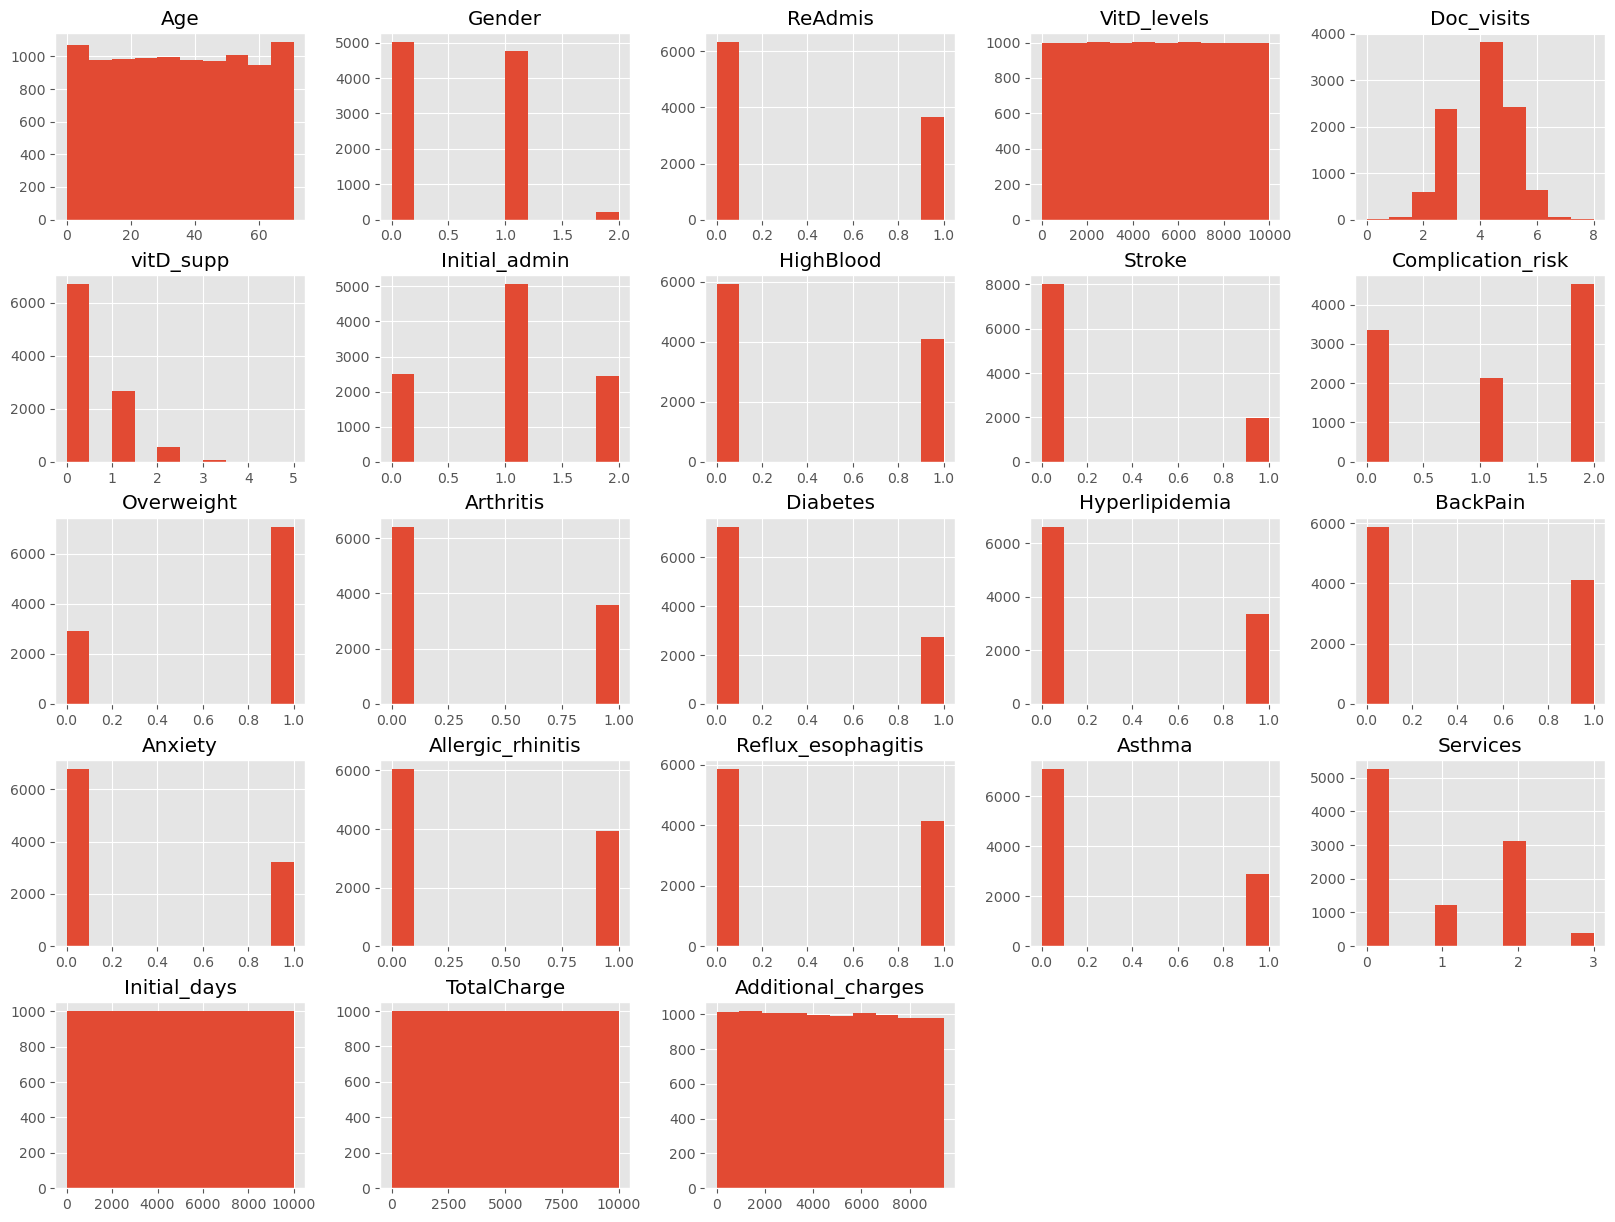

In [26]:
# https://www.datacamp.com/community/tutorials/preprocessing-in-data-science-part-1-centering-scaling-and-knn
plt.style.use('ggplot')
# df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv ' , sep = ';')
X = pruned_df.drop('ReAdmis', 1).values # drop target variable
y1 = pruned_df['ReAdmis'].values
pd.DataFrame.hist(pruned_df, figsize = [20,15]);

In [27]:
# https://realpython.com/knn-python/
# Correlations with target?
#correlation_matrix = pruned_df.corr()

#print(correlation_matrix["ReAdmis_Yes"] > 0.5)

### Split the Training Data

In [28]:
# Split dataset into two data groups: train and test
from sklearn.model_selection import train_test_split
train, test = train_test_split(pruned_df, test_size = 0.2) # 80% of data assigned to train

In [29]:
print("Train Shape: ", train.shape)
print("Test Shape: ", test.shape)

Train Shape:  (8000, 23)
Test Shape:  (2000, 23)


In [30]:
# Notice the first column (row numbers) shows the choices are quite random
print("Train: ", train.head())
print('---------'*10)
print("Test: ", test.head())

Train:        Age  Gender  ReAdmis  VitD_levels  Doc_visits  vitD_supp  Initial_admin  \
7141   29       0        1         9734           4          2              1   
7618   15       1        1          119           2          0              1   
6254   49       0        1         7922           4          0              0   
7265   16       1        1         1539           4          0              0   
2514    7       0        0         8964           4          0              1   

      HighBlood  Stroke  Complication_risk  ...  Hyperlipidemia  BackPain  \
7141          1       1                  2  ...               0         0   
7618          0       0                  2  ...               0         1   
6254          0       0                  0  ...               1         0   
7265          0       0                  2  ...               0         0   
2514          1       0                  2  ...               0         1   

      Anxiety  Allergic_rhinitis  Reflux_e

### Build Decision Tree

In [31]:
pruned_df.columns

Index(['Age', 'Gender', 'ReAdmis', 'VitD_levels', 'Doc_visits', 'vitD_supp',
       'Initial_admin', 'HighBlood', 'Stroke', 'Complication_risk',
       'Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain',
       'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma',
       'Services', 'Initial_days', 'TotalCharge', 'Additional_charges'],
      dtype='object')

In [32]:
# Feed training data into ML Algorithm and Build Decision Tree
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(max_leaf_nodes=10) # Tried default, 5, 10, 15; 10 & 15 were the same
clf=clf.fit(train[['Age', 'Gender', 'VitD_levels', 'Doc_visits', 'vitD_supp', 'Initial_admin', \
                   'HighBlood', 'Stroke', 'Complication_risk', 'Overweight', 'Arthritis', \
                   'Diabetes', 'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis', \
                   'Reflux_esophagitis', 'Asthma', 'Services', 'Initial_days', 'TotalCharge', \
                   'Additional_charges']], train['ReAdmis'])

In [33]:
clf.feature_importances_

array([0.        , 0.        , 0.00188001, 0.        , 0.        ,
       0.        , 0.        , 0.00102016, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00117126, 0.        , 0.98990247,
       0.00602611, 0.        ])

In [34]:
# https://stackoverflow.com/questions/1494492/graphviz-how-to-go-from-dot-to-a-graph
from sklearn import tree
with open("med_data.gif", 'w') as f:
    f = tree.export_graphviz(clf,
                            feature_names=['Age', 'Gender', 'VitD_levels', 'Doc_visits', 'vitD_supp', 'Initial_admin', \
                   'HighBlood', 'Stroke', 'Complication_risk', 'Overweight', 'Arthritis', \
                   'Diabetes', 'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis', \
                   'Reflux_esophagitis', 'Asthma', 'Services', 'Initial_days', 'TotalCharge', \
                   'Additional_charges'], out_file=f)

In [35]:
predictions = clf.predict(test[['Age', 'Gender', 'VitD_levels', 'Doc_visits', 'vitD_supp', 'Initial_admin', \
                   'HighBlood', 'Stroke', 'Complication_risk', 'Overweight', 'Arthritis', \
                   'Diabetes', 'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis', \
                   'Reflux_esophagitis', 'Asthma', 'Services', 'Initial_days', 'TotalCharge', \
                   'Additional_charges']])

In [36]:
from sklearn.metrics import accuracy_score
accuracy_score(test['ReAdmis'], predictions)

0.9755

### Random Forest

In [37]:
n_estimators_selected = 2000

In [38]:
from sklearn.ensemble import RandomForestClassifier
predictors = ['Age', 'Gender', 'VitD_levels', 'Doc_visits', 'vitD_supp', 'Initial_admin', \
                   'HighBlood', 'Stroke', 'Complication_risk', 'Overweight', 'Arthritis', \
                   'Diabetes', 'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis', \
                   'Reflux_esophagitis', 'Asthma', 'Services', 'Initial_days', 'TotalCharge', \
                   'Additional_charges']
outcome = 'ReAdmis'

X = pruned_df[predictors]
y = pruned_df[outcome]

rf = RandomForestClassifier(n_estimators=n_estimators_selected, random_state=1, oob_score=True)
rf.fit(X,y)
print(rf.oob_decision_function_)

[[0.9957204  0.0042796 ]
 [0.99463087 0.00536913]
 [0.99862448 0.00137552]
 ...
 [0.00551724 0.99448276]
 [0.00136054 0.99863946]
 [0.00416089 0.99583911]]


In [39]:
n_estimator = list(range(100, 3000, 100)) # Looks to flatten out @1500
oobScores = []
for n in n_estimator:
    rf = RandomForestClassifier(n_estimators=n, 
                                criterion='entropy', max_depth=5,
                                random_state=1, oob_score=True)
    rf.fit(X, y)
    oobScores.append(rf.oob_score_)
    print(n) # quick and dirty sense of time

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900


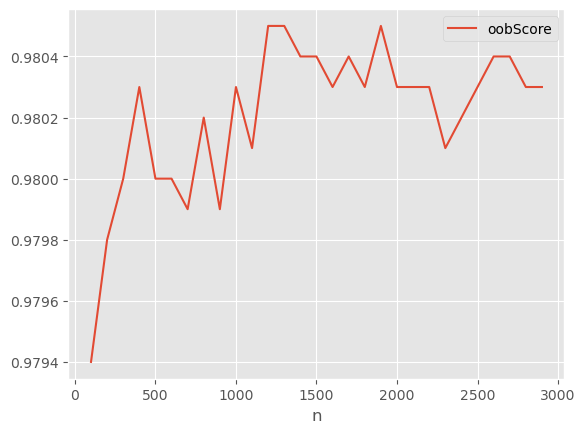

In [40]:
pd.DataFrame({
    'n': n_estimator, 
    'oobScore': oobScores
}).plot(x='n', y='oobScore');

### OOB Evaluation

In [41]:
# Import models and split utility function
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
# Set seed for reproducibility
SEED = 1
# Split data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3,
stratify= y,
random_state=SEED)

In [42]:
# Instantiate a classification-tree 'dt'
dt = DecisionTreeClassifier(max_depth=4,
min_samples_leaf=0.16,
random_state=SEED)
# Instantiate a BaggingClassifier 'bc'; set oob_score = True
bc = BaggingClassifier(base_estimator=dt, n_estimators=300,
oob_score=True, n_jobs=-1)
# Fit 'bc' to the training set
bc.fit(X_train, y_train)
# Predict the test set labels
y_pred = bc.predict(X_test)

/Users/jasonewillis/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [43]:
# Evaluate test set accuracy
test_accuracy = accuracy_score(y_test, y_pred)
# Extract the OOB accuracy from 'bc'
oob_accuracy = bc.oob_score_
# Print test set accuracy
print('Test set accuracy: {:.3f}'.format(test_accuracy))

Test set accuracy: 0.977


In [44]:
# Print OOB accuracy
print('OOB accuracy: {:.3f}'.format(oob_accuracy))

OOB accuracy: 0.978


In [45]:
predictors = ['Age', 'Gender', 'VitD_levels', 'Doc_visits', 'vitD_supp', 'Initial_admin', \
                   'HighBlood', 'Stroke', 'Complication_risk', 'Overweight', 'Arthritis', \
                   'Diabetes', 'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis', \
                   'Reflux_esophagitis', 'Asthma', 'Services', 'Initial_days', 'TotalCharge', \
                   'Additional_charges']
outcome = 'ReAdmis'

X = pd.get_dummies(pruned_df[predictors], drop_first=True)
y = pruned_df[outcome]

rf_all = RandomForestClassifier(n_estimators=n_estimators_selected, random_state=1)
rf_all.fit(X, y)

rf_all_entropy = RandomForestClassifier(n_estimators=n_estimators_selected, random_state=1,
                                        criterion='gini')
print(rf_all_entropy.fit(X, y))

RandomForestClassifier(n_estimators=2000, random_state=1)


In [46]:
from collections import defaultdict
from sklearn import metrics

rf = RandomForestClassifier(n_estimators=n_estimators_selected)
scores = defaultdict(list)
 
# crossvalidate the scores on a number of different random splits of the data
for _ in range(3):
    train_X, valid_X, train_y, valid_y = train_test_split(X, y, 
                                                          test_size=0.3)
    rf.fit(train_X, train_y)
    acc = metrics.accuracy_score(valid_y, rf.predict(valid_X))
    for column in X.columns:
        X_t = valid_X.copy()
        X_t[column] = np.random.permutation(X_t[column].values)
        shuff_acc = metrics.accuracy_score(valid_y, rf.predict(X_t))
        scores[column].append((acc-shuff_acc)/acc)
print('Features sorted by their score:')
print(sorted([(round(np.mean(score), 4), feat) for
              feat, score in scores.items()], reverse=True))

Features sorted by their score:
[(0.4375, 'Initial_days'), (0.0088, 'TotalCharge'), (0.0008, 'Stroke'), (0.0005, 'Initial_admin'), (0.0005, 'Complication_risk'), (0.0005, 'Allergic_rhinitis'), (0.0003, 'Asthma'), (0.0002, 'Services'), (0.0002, 'Overweight'), (0.0001, 'vitD_supp'), (0.0001, 'VitD_levels'), (0.0001, 'Gender'), (0.0, 'Anxiety'), (0.0, 'Age'), (-0.0001, 'Hyperlipidemia'), (-0.0001, 'BackPain'), (-0.0001, 'Arthritis'), (-0.0001, 'Additional_charges'), (-0.0002, 'HighBlood'), (-0.0003, 'Diabetes'), (-0.0005, 'Reflux_esophagitis'), (-0.0006, 'Doc_visits')]


In [47]:
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.3)
rf.fit(train_X, train_y)
valid_X_predict = rf.predict(valid_X)
acc = metrics.accuracy_score(valid_y, valid_X_predict) 
                             
acc

0.9793333333333333

In [48]:
set(rf.predict(valid_X))

{0, 1}

In [49]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(valid_y, valid_X_predict)
print(conf_mat)
# TP, FP, FN, TN

[[1862   26]
 [  36 1076]]


In [57]:
#from sklearn.ensemble import RandomForestRegressor

#regressor = RandomForestRegressor(n_estimators=20, random_state=0)
#regressor.fit(train_X, train_y)
#y_pred = regressor.predict(valid_X)

#from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#print(confusion_matrix(y_test,y_pred))
#print(classification_report(y_test,y_pred))
#print(accuracy_score(y_test, y_pred))

In [51]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[1862   37]
 [  33 1068]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1899
           1       0.97      0.97      0.97      1101

    accuracy                           0.98      3000
   macro avg       0.97      0.98      0.97      3000
weighted avg       0.98      0.98      0.98      3000

0.9766666666666667


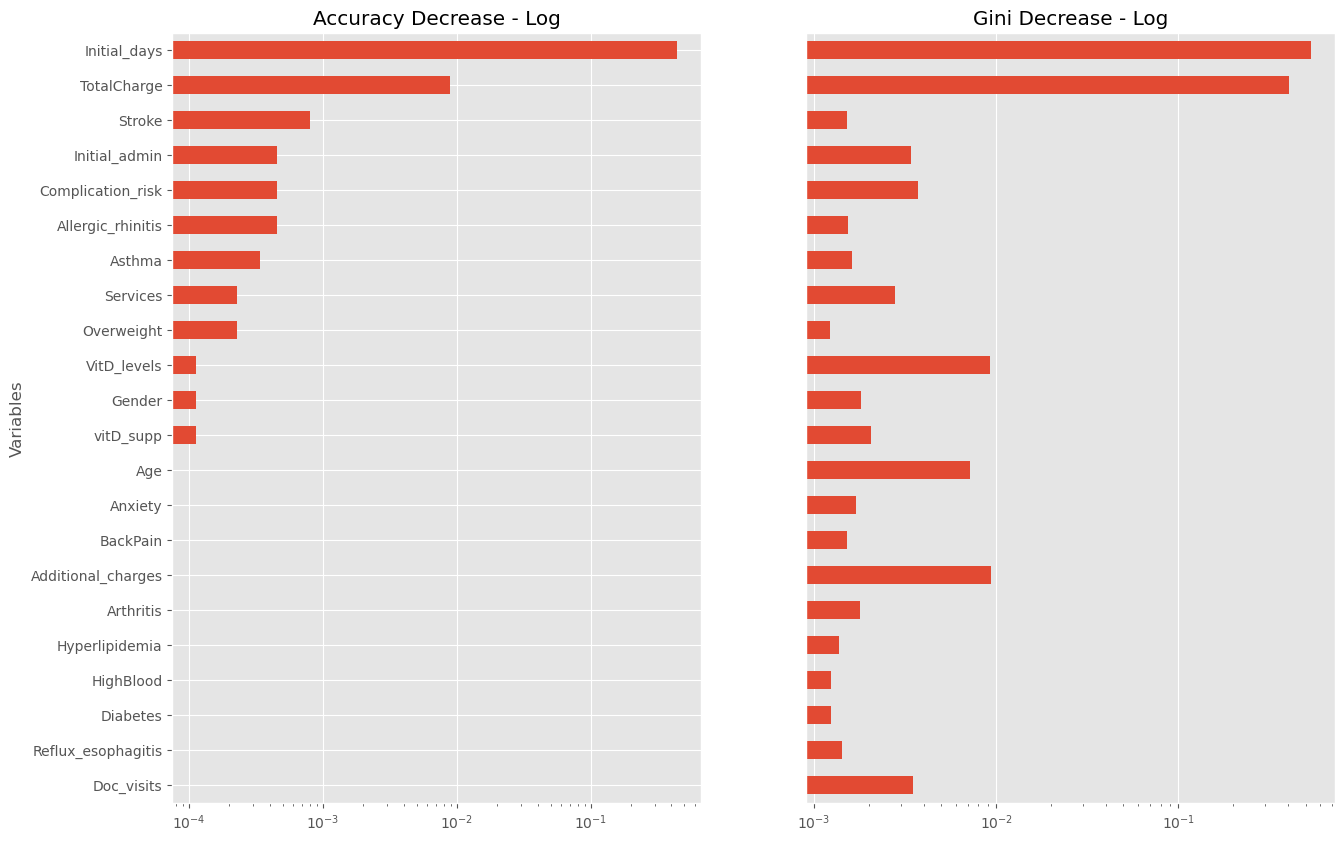

In [52]:
importances = rf_all.feature_importances_

df = pd.DataFrame({
    'feature': X.columns, 
    'Accuracy decrease': [np.mean(scores[column]) for column in 
                         X.columns],
    'Gini decrease': rf_all.feature_importances_, 
    'Entropy decrease': rf_all_entropy.feature_importances_,
})
df = df.sort_values('Accuracy decrease')

fig, axes = plt.subplots(ncols=2, figsize=(8, 5))
ax = df.plot(kind='barh', x='feature', y='Accuracy decrease', logx=True, figsize=(15,10), title='Accuracy Decrease - Log',
             legend=False, ax=axes[0])

ax.set_ylabel('Variables')

ax = df.plot(kind='barh', x='feature', y='Gini decrease', logx=True, title='Gini Decrease - Log',
             legend=False, ax=axes[1])
ax.set_ylabel('')
ax.get_yaxis().set_visible(False)

#plt.tight_layout()
plt.show()

### Accuracy and MSE

In [53]:
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import cross_val_score

In [55]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(train_y, valid_y))
print('Mean Squared Error:', metrics.mean_squared_error(train_y, valid_y))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(train_y, valid_y)))

ValueError: Found input variables with inconsistent numbers of samples: [7000, 3000]

### Sharding and Exporting Data

In [ ]:
print("------ Prune Data --------------")
print("pruned_df: ", pruned_df.shape)
print("")
print("------ Decision Tree Data ------")
print("train: ", train.shape)
print("test: ", test.shape)
print("")
print("------ Random Forest Data ------")
print("train_X: ", train_X.shape)
print("valid_X: ", valid_X.shape)
print("train_y: ", train_y.shape)
print("valid_y: ", valid_y.shape)


In [ ]:
# Export to CSV
pruned_df.to_csv('final_cleaned_dataset.csv', index=False)
#
train.to_csv('d_tree_train.csv', index=False)
test.to_csv('d_tree_test.csv', index=False)
#
train_X.to_csv('r_forest_train_X.csv', index=False)
valid_X.to_csv('r_forest_valid_X.csv', index=False)
train_y.to_csv('r_forest_train_y.csv', index=False)
valid_y.to_csv('r_forest_valid_y.csv', index=False)

In [58]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
# Import train_test_split
from sklearn.model_selection import train_test_split
# Import accuracy_score
from sklearn.metrics import accuracy_score
# Split the dataset into 80% train, 20% test
X_train, X_test, y_train, y_test= train_test_split(X, y,
test_size=0.2,
stratify=y,
random_state=1)
# Instantiate dt
dt = DecisionTreeClassifier(max_depth=2, random_state=1)

In [59]:
# Fit dt to the training set
dt.fit(X_train,y_train)
# Predict the test set labels
y_pred = dt.predict(X_test)
# Evaluate the test-set accuracy
accuracy_score(y_test, y_pred)

0.9745

In [60]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
# Import train_test_split
from sklearn.model_selection import train_test_split
# Import accuracy_score
from sklearn.metrics import accuracy_score
# Split dataset into 80% train, 20% test
X_train, X_test, y_train, y_test= train_test_split(X, y,
test_size=0.2,
stratify=y,
random_state=1)
# Instantiate dt, set 'criterion' to 'gini'
dt = DecisionTreeClassifier(criterion='gini', random_state=1)

In [61]:
# Fit dt to the training set
dt.fit(X_train,y_train)
# Predict test-set labels
y_pred= dt.predict(X_test)
# Evaluate test-set accuracy
accuracy_score(y_test, y_pred)

0.967

In [62]:
# Import DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
# Import train_test_split
from sklearn.model_selection import train_test_split
# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSE
# Split data into 80% train and 20% test
X_train, X_test, y_train, y_test= train_test_split(X, y,
test_size=0.2,
random_state=3)
# Instantiate a DecisionTreeRegressor 'dt'
dt = DecisionTreeRegressor(max_depth=4,
min_samples_leaf=0.1,
random_state=3)

In [63]:
# Fit 'dt' to the training-set
dt.fit(X_train, y_train)
# Predict test-set labels
y_pred = dt.predict(X_test)
# Compute test-set MSE
mse_dt = MSE(y_test, y_pred)
# Compute test-set RMSE
rmse_dt = mse_dt**(1/2)
# Print rmse_dt
print(rmse_dt)

0.14757422655650276


In [64]:
from sklearn.ensemble import RandomForestRegressor

SEED = 1
X_train, X_test, y_train, y_test= train_test_split(X, y,
test_size=0.3,
random_state=SEED)

rf = RandomForestRegressor(n_estimators=400,
                          min_samples_leaf=0.12,
                          random_state=SEED)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

In [65]:
rmse_test = MSE(y_test, y_pred)**(1/2)

print('Test set RMSE of rf: {:.2f}'.format(rmse_test))

Test set RMSE of rf: 0.14


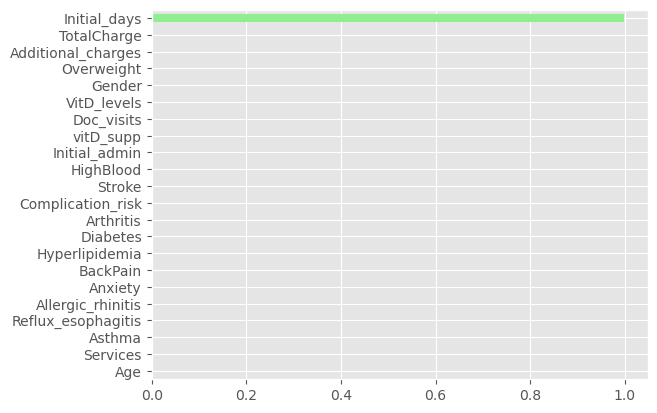

In [66]:
importances_rf = pd.Series(rf.feature_importances_, index = X.columns)

# Sort
sorted_importances_rf = importances_rf.sort_values()

# Horizontal Bar Plot
sorted_importances_rf.plot(kind='barh', color='lightgreen'); plt.show()